# DATA PROCESSING

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Intel_CPUs.csv', usecols=['Lithography','TDP'])
# df=df.rename(columns={"Lithography": "Lithography","TDP": "TDP"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Lithography  2212 non-null   object
 1   TDP          2216 non-null   object
dtypes: object(2)
memory usage: 35.8+ KB


In [ ]:
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)

# df['Lithography']=df['Lithography'].str.strip(' nm')
# df['TDP']=df['TDP'].str.strip(' W')
# df = df[0 : 200]
# df = df.drop(df.index[df['Lithography'] == "-1"])
# df.to_csv('/content/drive/MyDrive/data1.csv')
# df['Lithography']=df['Lithography'].str.strip(' nm').astype(int)
# df['TDP']=df['TDP'].str.strip(' W').astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Lithography  408 non-null    object
 1   TDP          408 non-null    object
dtypes: object(2)
memory usage: 6.5+ KB


In [ ]:
df.to_csv('/content/drive/MyDrive/data/df_Measures.csv', index=False)

# GRAPH DRAWING

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite 
B = nx.Graph() 
Lithography = df['Lithography']
TDP = df['TDP']
print("Số (Lithography): ", len(Lithography.unique()))
print("số (TDP): ", len(TDP.unique()))
print("số cạnh", len(df))


Số (Lithography):  9
số (TDP):  230
số cạnh 408


Bipartite graph

In [ ]:
# Đưa dữ liệu từ dataframe vào đồ thị vô hướng
for index, row in df.iterrows():
  B.add_edge(row['Lithography'], row['TDP'], weight=1)
B.add_nodes_from(TDP, bipartite = 0)
B.add_nodes_from(Lithography, bipartite = 1)

<Figure size 864x864 with 0 Axes>

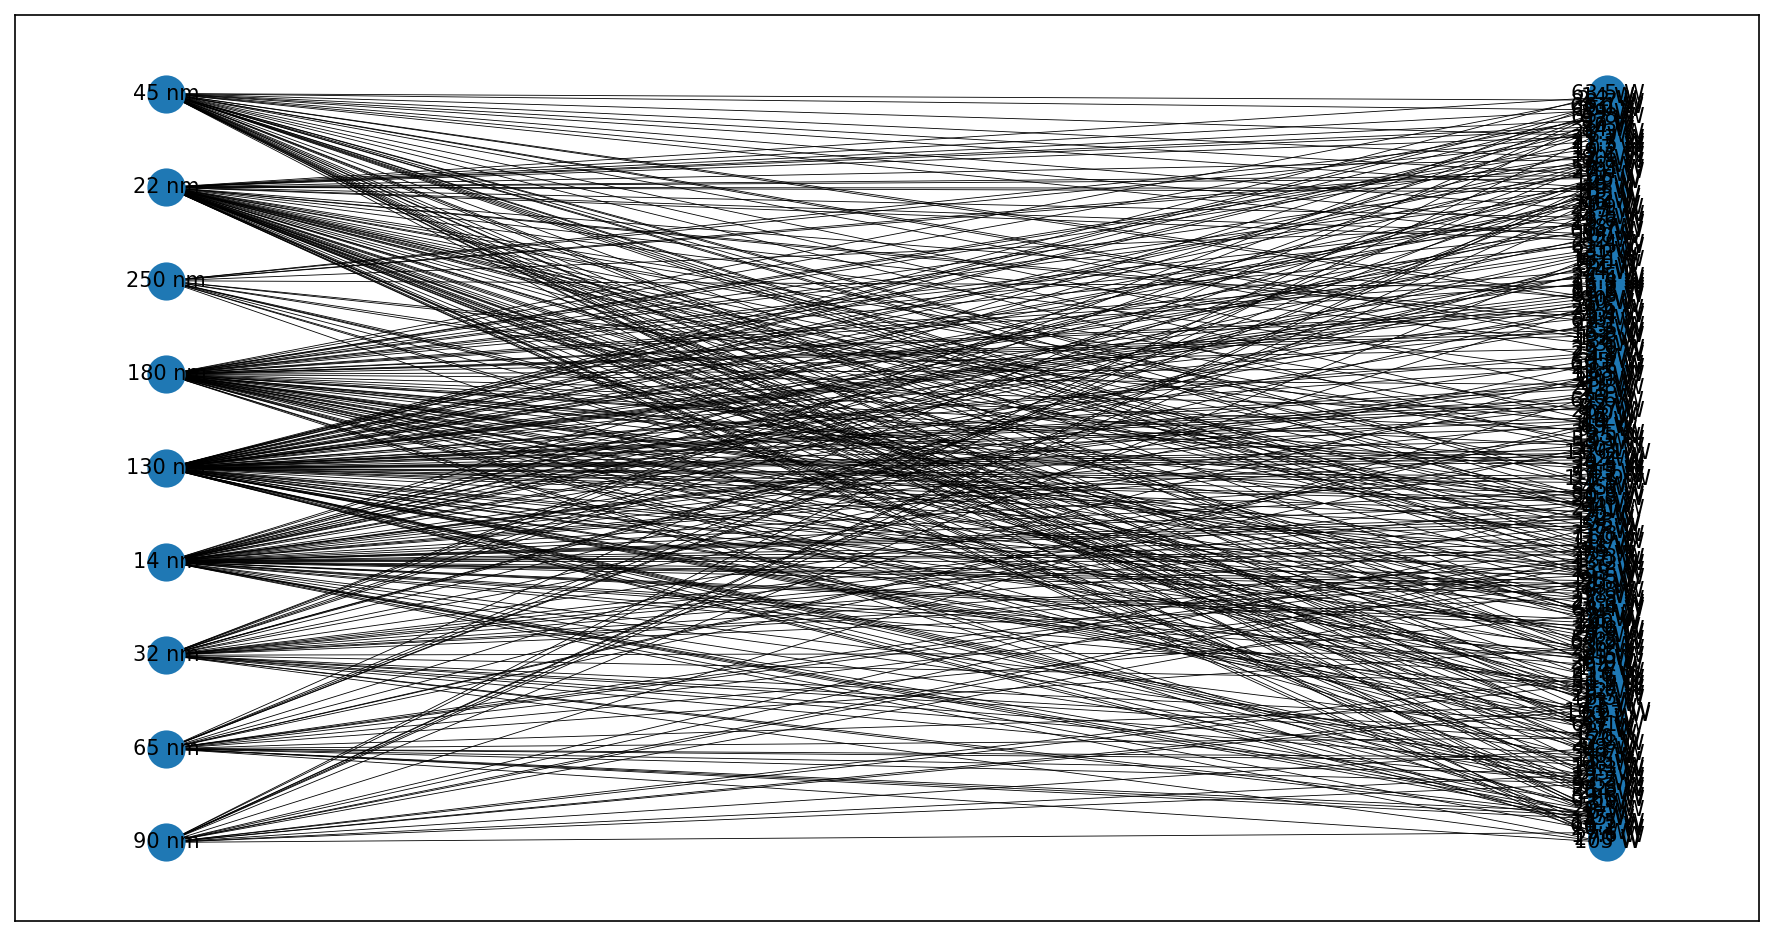

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1, figsize=(15,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Lithography), font_size=10,width=0.4)

Đồ thị 1 phía

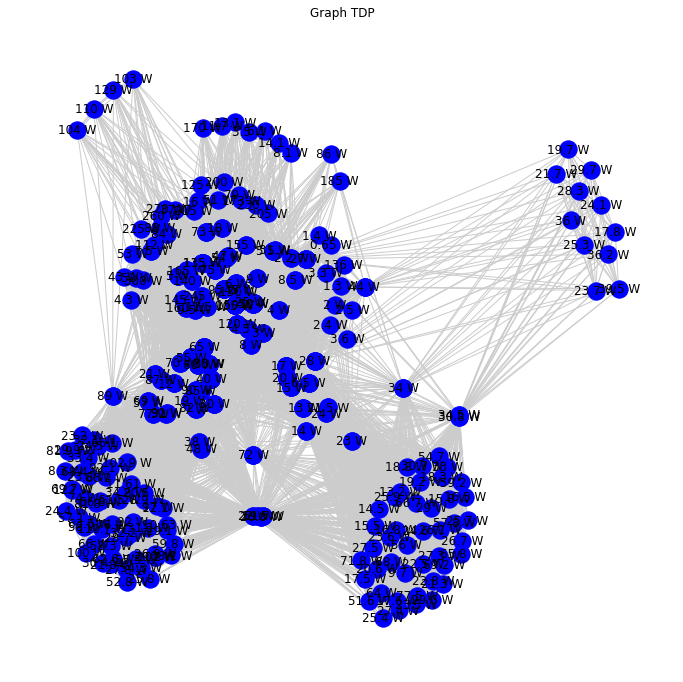

In [ ]:
G = bipartite.weighted_projected_graph(B, TDP)
plt.figure(figsize=(12,12))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G, layout, nodelist=TDP, node_size=300, node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color="#cccccc")
node_lables = dict(zip(TDP, TDP))
nx.draw_networkx_labels(G, layout, labels=node_lables)
plt.axis('off')
plt.title("Graph TDP")
plt.show()

Xuất đồ thị 1 phía ra csv

In [ ]:
labels = nx.get_edge_attributes(G,'weight')
df2=pd.DataFrame(columns=['source','target','weight'])
for key, value in labels.items():
  df2 = df2.append({'source':key[0],'target':key[1],'weight':value},ignore_index=True)
df2.to_csv('/content/drive/MyDrive/data/mydata_to_gephi.csv',index=False,header=True )
df2

# ALGORITHMS



## Louvain

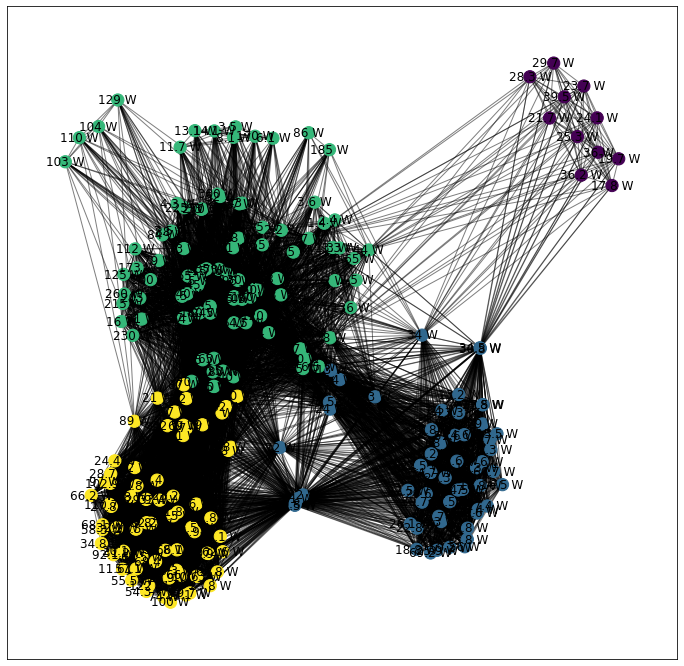

In [ ]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
plt.figure(figsize=(12,12))
partition = community_louvain.best_partition(G)

pos=nx.spring_layout(G)

cmap=cm.get_cmap('viridis', max(partition.values()) +1)
nx.draw_networkx_nodes(G,pos, partition.keys(),node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G,pos,alpha=0.5)
nx.draw_networkx_labels(G,pos)
plt.show()

In [ ]:
len(partition.values())

230

In [ ]:
import numpy as np
values = list(partition.values())
print('number of comunities:', len(np.unique(values)))

number of comunities: 4


In [ ]:
# for i in range(len(np.unique(values))):
#   print("nhóm", i,"^^^^^^^^^^^^^^^^")
#   for name, k in partition.items():
#     if k==i:
#       print(name)
#   print("")
list1=[];list2=[];list3=[];list4=[];
for name, k in partition.items():
  if k==0:
    list1.append(name)
  if k==1:
      list2.append(name)
  if k==2:
    list3.append(name)
  if k==3:
    list4.append(name)


In [ ]:
print(list1)
print(list2)
print(list3)
print(list4)
print(len(list1)+len(list2)+len(list3)+len(list4))

['29.7 W', '25.3 W', '39.5 W', '36 W', '36.2 W', '28.3 W', '24.1 W', '23.7 W', '21.7 W', '19.7 W', '17.8 W']
['7 W', '12 W', '10.63 W', '11.61 W', '28.7 W', '68.4 W', '30.4 W', '62.6 W', '23.2 W', '32.2 W', '12.1 W', '21 W', '59.8 W', '57.1 W', '89 W', '54.3 W', '25.8 W', '26.9 W', '30 W', '82 W', '20.1 W', '68.1 W', '32 W', '81.9 W', '66.1 W', '76 W', '31.2 W', '61.5 W', '38 W', '24.5 W', '29.9 W', '69.7 W', '21.8 W', '29.1 W', '69 W', '102.9 W', '81.8 W', '66.2 W', '110.7 W', '92.1 W', '58 W', '20.5 W', '91 W', '57 W', '122 W', '100 W', '97 W', '107 W', '77 W', '87 W', '74 W', '66 W', '92 W', '48 W', '19 W', '8.3 W', '66.8 W', '34.8 W', '58.3 W', '55.5 W', '52.8 W', '33.4 W', '32.1 W', '24.4 W', '28.9 W', '23.8 W', '63.5 W', '27.8 W']
['4.5 W', '15 W', '130 W', '4.3 W', '10 W', '55 W', '88 W', '35 W', '5.5 W', '6 W', '6.5 W', '7.5 W', '11.5 W', '37 W', '17 W', '5 W', '115 W', '27 W', '84 W', '65 W', '95 W', '103 W', '40 W', '86 W', '28 W', '70 W', '73 W', '31 W', '18 W', '53 W', '51 

In [ ]:
# Save to excel
df1= df.loc[df['TDP'].isin(list1)]
df2= df.loc[df['TDP'].isin(list2)]
df3= df.loc[df['TDP'].isin(list3)]
df4= df.loc[df['TDP'].isin(list4)]


with pd.ExcelWriter('/content/drive/MyDrive/data/Louvain.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='G1', index=False)
    df2.to_excel(writer, sheet_name='G2', index=False)
    df3.to_excel(writer, sheet_name='G3', index=False)
    df4.to_excel(writer, sheet_name='G4', index=False)

In [ ]:
df4

,Lithography,TDP
33,130 nm,61 W
36,180 nm,22.5 W
39,180 nm,27.3 W
40,180 nm,20.8 W
45,130 nm,20.8 W
...,...,...
371,180 nm,16.5 W
372,180 nm,22 W
373,180 nm,17.6 W
374,180 nm,25.7 W



Graph between 3 cluster(louvain)

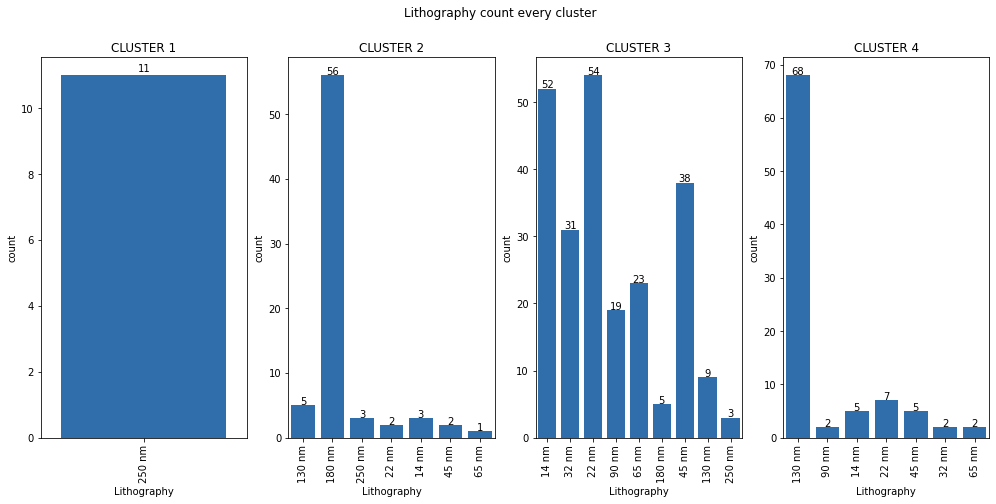

In [ ]:
import seaborn as sns
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4,figsize=(17,7))
fig.suptitle('Lithography count every cluster')
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True, dpi=120)
ax1.set_title('CLUSTER 1')
ax2.set_title('CLUSTER 2')
ax3.set_title('CLUSTER 3')
ax4.set_title('CLUSTER 4')
graph = sns.countplot(ax=ax1,x='Lithography', data=df1, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
graph = sns.countplot(ax=ax2,x='Lithography', data=df2,color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
graph = sns.countplot(ax=ax3,x='Lithography', data=df3, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
graph = sns.countplot(ax=ax4,x='Lithography', data=df4, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
# graph = sns.countplot(ax=ax5,x='Lithography', data=df4)
# graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
# for p in graph.patches:
#     height = p.get_height()
#     graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## *Girvan* Newman

Number communitis:2
Community 0:{'105 W', '270 W', '17.6 W', '5 W', '20.1 W', '66.2 W', '14.5 W', '51 W', '35 W', '6 W', '17 W', '0.65 W', '3 W', '2.4 W', '20.5 W', '23.8 W', '59.8 W', '54.3 W', '65 W', '32.2 W', '5.5 W', '18.3 W', '14.1 W', '68 W', '155 W', '50 W', '54.7 W', '4.3 W', '88 W', '120 W', '77 W', '170 W', '8.5 W', '22.8 W', '57 W', '87 W', '68.1 W', '23 W', '13 W', '110.7 W', '7.5 W', '27 W', '10.63 W', '16.5 W', '12 W', '52.8 W', '30.7 W', '115 W', '110 W', '51.6 W', '25.7 W', '1.4 W', '9.5 W', '85 W', '26.9 W', '25 W', '34.5 W', '86 W', '23.2 W', '28.9 W', '57.8 W', '69.2 W', '56 W', '34.8 W', '140 W', '200 W', '28 W', '225 W', '34 W', '68.4 W', '24.6 W', '27.8 W', '91 W', '18 W', '18.8 W', '79 W', '215 W', '95 W', '19.5 W', '6.5 W', '23.3 W', '3.6 W', '13.2 W', '75 W', '130 W', '27.3 W', '4.5 W', '48 W', '31 W', '11.7 W', '160 W', '71.8 W', '37 W', '58 W', '135 W', '173 W', '72 W', '20 W', '7 W', '64 W', '55 W', '20.8 W', '45 W', '2 W', '81.9 W', '30.8 W', '24.5 W', '14

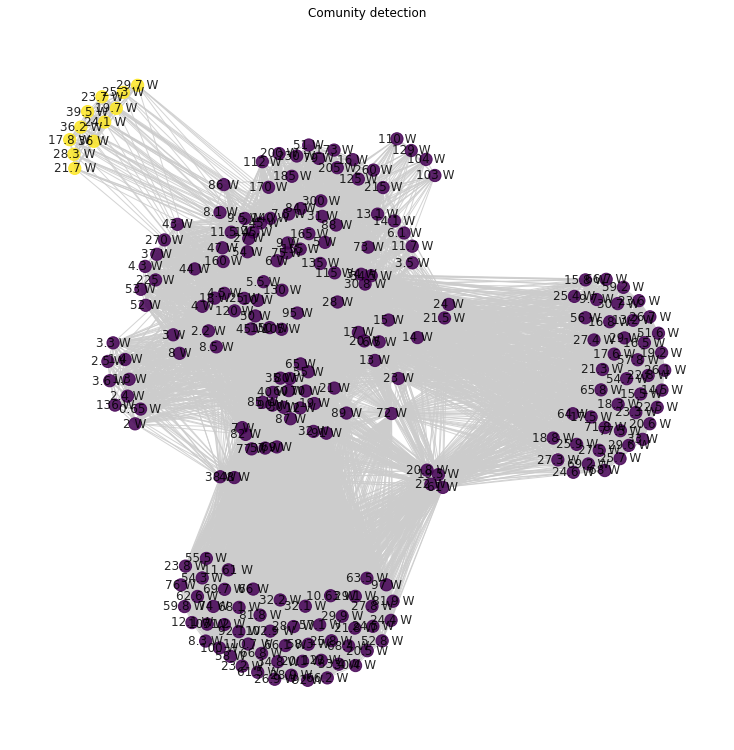

In [ ]:
import numpy as np
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
cluster = girvan_newman(G)
node_groups = next(cluster)
n = len(node_groups)
print('Number communitis:'+str(n))
for i in range(n):
  print('Community '+str(i)+':'+str(node_groups[i]))
color = list(np.random.choice(range(256),size=n+1))
color_node = []
dict={}
for node in G:
  for i in range(n):
    if node in node_groups[i]:
      color_node.append(color[i])
      dict.update({node: color[i]})
      break
plt.figure(figsize=(10,10))
nx.draw(G,pos,node_size=150,node_color=color_node,edge_color="#cccccc",alpha=0.85,with_labels=True,width=1)
plt.title('Comunity detection')
plt.show()

In [ ]:
print(len(node_groups[0])+len(node_groups[1]))

230


In [ ]:
df1= df.loc[df['TDP'].isin(node_groups[0])]
df2= df.loc[df['TDP'].isin(node_groups[1])]
print(len(df1)+len(df2))

408


In [ ]:
# save to excel
with pd.ExcelWriter('/content/drive/MyDrive/data/Girvan_Newman.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='G1', index=False)
    df2.to_excel(writer, sheet_name='G2', index=False)

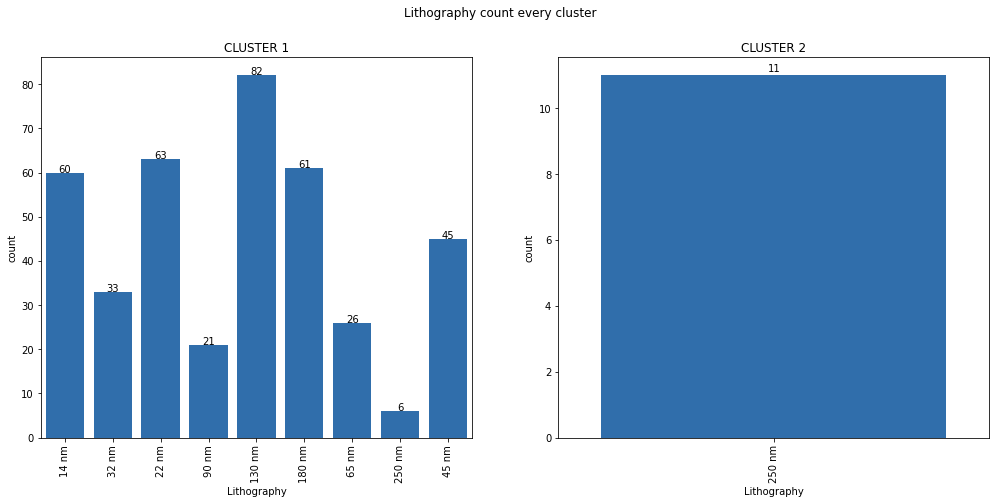

In [ ]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,7))
fig.suptitle('Lithography count every cluster')
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True, dpi=120)
ax1.set_title('CLUSTER 1')
ax2.set_title('CLUSTER 2')
graph = sns.countplot(ax=ax1,x='Lithography', data=df1, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
graph = sns.countplot(ax=ax2,x='Lithography', data=df2, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## K-Mean

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sklearn.cluster as cluster

In [ ]:
df

,Lithography,TDP
0,14 nm,4.5 W
1,14 nm,15 W
2,32 nm,130 W
3,22 nm,4.3 W
4,22 nm,10 W
...,...,...
403,14 nm,205 W
404,14 nm,173 W
405,22 nm,165 W
406,22 nm,155 W


In [ ]:
# Loại bỏ kí tự chuỗi, chyển sang kiểu float
df['Lithography']=df['Lithography'].str.strip(' nm').astype(float)
df['TDP']=df['TDP'].str.strip(' W').astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lithography  408 non-null    float64
 1   TDP          408 non-null    float64
dtypes: float64(2)
memory usage: 6.5 KB


In [ ]:
X = df.iloc[:, [0,1]].values
X

array([[ 14.  ,   4.5 ],
       [ 14.  ,  15.  ],
       [ 32.  , 130.  ],
       [ 22.  ,   4.3 ],
       [ 22.  ,  10.  ],
       [ 22.  ,  55.  ],
       [ 90.  ,  88.  ],
       [ 22.  ,  35.  ],
       [ 90.  ,   5.5 ],
       [ 14.  ,   6.  ],
       [ 14.  ,   6.5 ],
       [ 14.  ,  10.  ],
       [ 22.  ,   7.5 ],
       [ 22.  ,  11.5 ],
       [ 22.  ,  37.  ],
       [ 22.  ,  15.  ],
       [ 22.  ,  17.  ],
       [ 90.  ,   5.  ],
       [130.  ,   7.  ],
       [ 90.  ,   7.5 ],
       [ 90.  , 115.  ],
       [130.  ,  12.  ],
       [ 90.  ,  27.  ],
       [130.  ,  10.63],
       [130.  ,  11.61],
       [130.  ,  28.7 ],
       [ 90.  ,  84.  ],
       [130.  ,  68.4 ],
       [130.  ,  30.4 ],
       [130.  ,  62.6 ],
       [130.  ,  23.2 ],
       [130.  ,  32.2 ],
       [ 90.  ,  65.  ],
       [130.  ,  61.  ],
       [130.  ,  12.1 ],
       [ 90.  ,  21.  ],
       [180.  ,  22.5 ],
       [ 65.  ,  95.  ],
       [130.  ,  59.8 ],
       [180.  ,  27.3 ],


In [ ]:
#Building the Model
#Thuật toán KMeans để quyết định số cụm tối ưu, KMeans sử dụng Elbow Mmethod
#tìm K bằng cách sử dụng Phương pháp ELBOW trên Tính toán KMEANS
from sklearn.cluster import KMeans
wcss=[]

#giả định số lượng max của clusters = 10
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='random')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ là công thức được sử dụng để tách các điểm dữ liệu thành các cụm

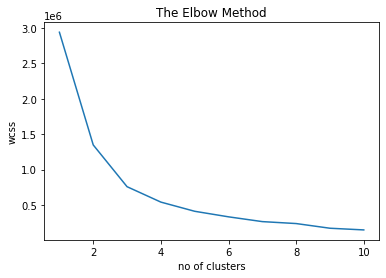

In [ ]:
#sd phương pháp ELBOW để nhận giá trị tối ưu của K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3,init='random')
kmeansmodel.fit(X)
y_kmeans= kmeansmodel.fit_predict(X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


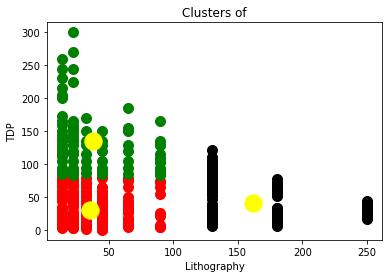

In [ ]:
#Trực quan hóa kết quả
from matplotlib.colors import ListedColormap
raw_colors = ("red", "green", "black", "cyan", "magenta")
colors = ListedColormap(raw_colors)
for i in range(3):
  plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s= 100, c = colors(i))
X_clusters = kmeansmodel.cluster_centers_[:, 0]
Y_clusters = kmeansmodel.cluster_centers_[:, 1]
plt.scatter(X_clusters, Y_clusters, s = 300, c = "yellow")
plt.title('Clusters of')
plt.xlabel('Lithography')
plt.ylabel('TDP')
plt.show()

In [ ]:

print(len(X[y_kmeans==0])+len(X[y_kmeans==1])+len(X[y_kmeans==2]))


408


In [ ]:
#Các cụm khi thêm lại kí tự W để dễ quan sát
cum1= X[y_kmeans==0,1]
cum1= X[y_kmeans==0,1].astype(str)
list1 = [item + " W" for item in cum1]
cum2= X[y_kmeans==1,1]
cum2= X[y_kmeans==1,1].astype(str)
list2 = [item + " W" for item in cum2]
cum3= X[y_kmeans==2,1]
cum3= X[y_kmeans==2,1].astype(str)
list3 = [item + " W" for item in cum3]
print(list1)
print(list2)
print(list3)

['7.0 W', '12.0 W', '10.63 W', '11.61 W', '28.7 W', '68.4 W', '30.4 W', '62.6 W', '23.2 W', '32.2 W', '61.0 W', '12.1 W', '22.5 W', '59.8 W', '27.3 W', '20.8 W', '57.1 W', '20.8 W', '26.1 W', '19.5 W', '89.0 W', '54.3 W', '9.7 W', '25.8 W', '18.3 W', '71.8 W', '26.9 W', '22.8 W', '17.0 W', '30.0 W', '17.5 W', '34.5 W', '82.0 W', '69.2 W', '30.7 W', '20.1 W', '68.1 W', '27.5 W', '19.5 W', '32.0 W', '15.8 W', '30.8 W', '66.7 W', '25.9 W', '22.0 W', '14.5 W', '29.7 W', '81.9 W', '66.1 W', '24.6 W', '35.0 W', '14.0 W', '28.0 W', '64.0 W', '23.0 W', '76.0 W', '13.2 W', '31.2 W', '61.5 W', '38.0 W', '21.5 W', '70.0 W', '24.5 W', '25.3 W', '29.9 W', '69.7 W', '61.0 W', '34.5 W', '57.8 W', '16.8 W', '21.8 W', '29.1 W', '33.0 W', '69.0 W', '102.9 W', '54.7 W', '15.5 W', '21.0 W', '29.0 W', '81.8 W', '66.2 W', '110.7 W', '92.1 W', '58.0 W', '51.6 W', '34.0 W', '20.5 W', '122.0 W', '90.0 W', '100.0 W', '97.0 W', '91.0 W', '107.0 W', '40.0 W', '85.0 W', '74.0 W', '72.0 W', '80.0 W', '60.0 W', '66.

In [ ]:
#Các cụm khi có kiểu float.
for i in range(3):
  print("Cụm thứ: ",i)
  print(X[y_kmeans==i,1])

Cụm thứ:  0
[  7.    12.    10.63  11.61  28.7   68.4   30.4   62.6   23.2   32.2
  61.    12.1   22.5   59.8   27.3   20.8   57.1   20.8   26.1   19.5
  89.    54.3    9.7   25.8   18.3   71.8   26.9   22.8   17.    30.
  17.5   34.5   82.    69.2   30.7   20.1   68.1   27.5   19.5   32.
  15.8   30.8   66.7   25.9   22.    14.5   29.7   81.9   66.1   24.6
  35.    14.    28.    64.    23.    76.    13.2   31.2   61.5   38.
  21.5   70.    24.5   25.3   29.9   69.7   61.    34.5   57.8   16.8
  21.8   29.1   33.    69.   102.9   54.7   15.5   21.    29.    81.8
  66.2  110.7   92.1   58.    51.6   34.    20.5  122.    90.   100.
  97.    91.   107.    40.    85.    74.    72.    80.    60.    66.
  65.    57.    92.    77.5   55.    87.    29.6   65.8   27.4   34.
  72.    25.4   39.5   68.    77.    23.3   59.2   21.3   36.    48.
  19.2   36.2   44.    30.8   56.     8.3   20.    20.6   23.6   66.8
   6.5   28.    24.    34.8   18.8   26.7   16.5   22.    17.6   25.7
  58.3   15.   

In [ ]:
#save to excel
df1= pd.DataFrame(X[y_kmeans==0],columns=['Lithography', 'TDP'])
df2= pd.DataFrame(X[y_kmeans==1],columns=['Lithography', 'TDP'])
df3= pd.DataFrame(X[y_kmeans==2],columns=['Lithography', 'TDP'])

with pd.ExcelWriter('/content/drive/MyDrive/data/Kmean.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='G1', index=False)
    df2.to_excel(writer, sheet_name='G2', index=False)
    df3.to_excel(writer, sheet_name='G3', index=False)
    

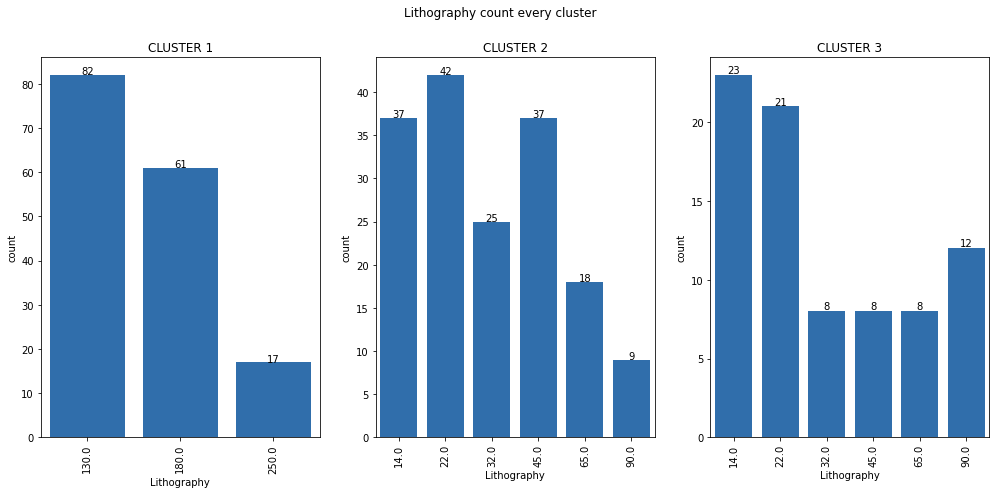

In [ ]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,7))
fig.suptitle('Lithography count every cluster')
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True, dpi=120)
ax1.set_title('CLUSTER 1')
ax2.set_title('CLUSTER 2')
ax3.set_title('CLUSTER 3')
graph = sns.countplot(ax=ax1,x='Lithography', data=df1, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
graph = sns.countplot(ax=ax2,x='Lithography', data=df2, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
graph = sns.countplot(ax=ax3,x='Lithography', data=df3, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

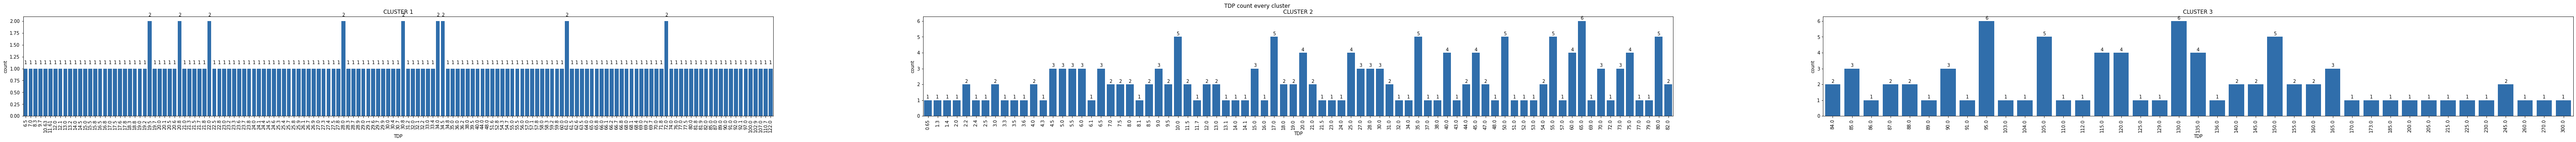

In [ ]:
# Biểu đồ count TPD từng cụm
#Dùng để so sánh tương quan 2 thuộc tính(Lithographi, TDP)
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(100,4))
fig.suptitle('TDP count every cluster')
ax1.set_title('CLUSTER 1')
ax2.set_title('CLUSTER 2')
ax3.set_title('CLUSTER 3')
graph = sns.countplot(ax=ax1,x='TDP', data=df1, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
graph = sns.countplot(ax=ax2,x='TDP', data=df2, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
graph = sns.countplot(ax=ax3,x='TDP', data=df3, color='#1b6ebf')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


# MEASURE

## Page Rank


In [ ]:
page_rank = nx.pagerank(G)
for node in sorted(page_rank,key=page_rank.get,reverse=True):
  print(node, round(page_rank[node],6))

65 W 0.01246
35 W 0.011646
80 W 0.011646
55 W 0.011537
17 W 0.011376
60 W 0.010722
28 W 0.010651
20 W 0.010453
40 W 0.009561
90 W 0.009528
85 W 0.009528
130 W 0.009452
95 W 0.009452
70 W 0.009105
10 W 0.008638
150 W 0.008638
50 W 0.008638
105 W 0.008638
15 W 0.008564
72 W 0.008475
6.5 W 0.008276
12 W 0.00791
25 W 0.007715
45 W 0.007715
7 W 0.007444
82 W 0.007444
120 W 0.007443
30 W 0.007384
13 W 0.007175
87 W 0.007021
115 W 0.006911
135 W 0.006911
19 W 0.006657
75 W 0.006639
21 W 0.006548
4.5 W 0.00652
61 W 0.006392
20.8 W 0.006392
19.5 W 0.006392
22 W 0.006392
27 W 0.005937
77 W 0.005827
69 W 0.005827
57 W 0.005827
6 W 0.005825
9 W 0.005825
32 W 0.005735
91 W 0.005735
5 W 0.005716
165 W 0.005716
34 W 0.005682
14 W 0.005558
21.5 W 0.005466
24 W 0.005466
38 W 0.005268
48 W 0.005268
23 W 0.004998
11.5 W 0.004903
140 W 0.004903
9.5 W 0.004903
47 W 0.004903
160 W 0.004903
145 W 0.004903
245 W 0.004903
54 W 0.004903
34.5 W 0.004764
30.8 W 0.004764
73 W 0.004732
44 W 0.00456
89 W 0.004464
3 

In [ ]:
# stats=pd.DataFrame(G.nodes())
# stats.columns=['Node']

In [ ]:
# pagerank = [v for k, v in nx.pagerank(G).items()]
# stats['pagerank']=pagerank
# stats_pagerank=stats[['Node','pagerank']]
# stats_pagerank.sort_values(by='pagerank', ascending=False).head(10)

In [ ]:
# import matplotlib.pyplot as plt
# edge_width=[G[u][v] for u,v in G.edges]
# fig, ax=plt.subplots(1,1,figsize=(20,20),dpi=50)
# pos=nx.spring_layout(G)
# nodes=nx.draw_networkx_nodes(G,pos,node_size=150, cmap=plt.cm.plasma, node_color=list(nx.pagerank(G).values()),nodelist=nx.pagerank(G).keys())
# nedges=nx.draw_networkx_edges(G,pos,alpha=0.5)
# plt.colorbar(nodes)
# plt.show()

## Closeness_centrality

In [ ]:
closeness_centrality = nx.closeness_centrality(G)
for node in sorted(closeness_centrality,key=closeness_centrality.get,reverse=True):
  print(node, round(closeness_centrality[node],6))

72 W 0.812057
65 W 0.803509
55 W 0.795139
35 W 0.792388
80 W 0.792388
60 W 0.784247
28 W 0.773649
17 W 0.768456
90 W 0.765886
85 W 0.765886
20 W 0.763333
40 W 0.758278
70 W 0.753289
12 W 0.731629
7 W 0.729299
82 W 0.729299
6.5 W 0.724684
15 W 0.720126
87 W 0.717868
61 W 0.713396
20.8 W 0.713396
19.5 W 0.713396
22 W 0.713396
21 W 0.71118
30 W 0.70679
13 W 0.70679
19 W 0.70679
69 W 0.693939
57 W 0.693939
77 W 0.693939
32 W 0.691843
91 W 0.691843
14 W 0.671554
130 W 0.669591
95 W 0.669591
38 W 0.663768
48 W 0.663768
21.5 W 0.66185
24 W 0.66185
10 W 0.659942
150 W 0.659942
50 W 0.659942
105 W 0.659942
25 W 0.654286
45 W 0.654286
120 W 0.646893
4.5 W 0.641457
115 W 0.639665
135 W 0.639665
23 W 0.637883
89 W 0.636111
75 W 0.630854
34 W 0.629121
6 W 0.622283
5 W 0.622283
27 W 0.622283
9 W 0.622283
165 W 0.622283
11.5 W 0.612299
140 W 0.612299
9.5 W 0.612299
47 W 0.612299
160 W 0.612299
145 W 0.612299
245 W 0.612299
54 W 0.612299
73 W 0.609043
4 W 0.609043
3 W 0.607427
8 W 0.607427
18 W 0.5963

## Clustering_coefficient

In [ ]:
Clustering_coefficient = nx.clustering(G)
for node in sorted(Clustering_coefficient,key=Clustering_coefficient.get,reverse=True):
  print(node, round(Clustering_coefficient[node],6))

4.3 W 1.0
37 W 1.0
10.63 W 1.0
11.61 W 1.0
28.7 W 1.0
68.4 W 1.0
30.4 W 1.0
62.6 W 1.0
23.2 W 1.0
32.2 W 1.0
12.1 W 1.0
22.5 W 1.0
59.8 W 1.0
27.3 W 1.0
103 W 1.0
57.1 W 1.0
26.1 W 1.0
54.3 W 1.0
9.7 W 1.0
25.8 W 1.0
18.3 W 1.0
71.8 W 1.0
26.9 W 1.0
22.8 W 1.0
17.5 W 1.0
69.2 W 1.0
30.7 W 1.0
20.1 W 1.0
68.1 W 1.0
27.5 W 1.0
15.8 W 1.0
86 W 1.0
66.7 W 1.0
25.9 W 1.0
14.5 W 1.0
29.7 W 1.0
81.9 W 1.0
66.1 W 1.0
24.6 W 1.0
64 W 1.0
76 W 1.0
13.2 W 1.0
31.2 W 1.0
61.5 W 1.0
24.5 W 1.0
25.3 W 1.0
29.9 W 1.0
69.7 W 1.0
57.8 W 1.0
16.8 W 1.0
21.8 W 1.0
29.1 W 1.0
33 W 1.0
102.9 W 1.0
54.7 W 1.0
15.5 W 1.0
29 W 1.0
81.8 W 1.0
66.2 W 1.0
110.7 W 1.0
92.1 W 1.0
58 W 1.0
51.6 W 1.0
20.5 W 1.0
53 W 1.0
51 W 1.0
112 W 1.0
3.3 W 1.0
3.5 W 1.0
122 W 1.0
104 W 1.0
185 W 1.0
100 W 1.0
97 W 1.0
107 W 1.0
16 W 1.0
8.1 W 1.0
6.1 W 1.0
11.7 W 1.0
13.1 W 1.0
14.1 W 1.0
0.65 W 1.0
2 W 1.0
3.6 W 1.0
1.3 W 1.0
1.4 W 1.0
2.4 W 1.0
2.5 W 1.0
170 W 1.0
260 W 1.0
300 W 1.0
52 W 1.0
79 W 1.0
110 W 1.0
74 W 1.0
66 W

In [ ]:
Clustering_coefficient = nx.clustering(G)
a=0
for node in sorted(Clustering_coefficient,key=Clustering_coefficient.get,reverse=True):
  if (Clustering_coefficient[node]==1):
    a=a+1
print(a)

148
